# Poorya MohammadiNasab(400722138)
## HW6

# Q1-A

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

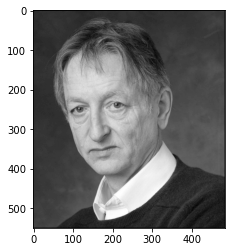

In [19]:
img = cv2.imread('hinton.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(img,cmap='gray')

In [20]:
# threshold the image (global thresholding)
def Bin_global(img,threshold_val):
    ret, thresh = cv2.threshold(img,threshold_val,255,cv2.THRESH_BINARY)
    plt.imshow(thresh,cmap='gray')
    return thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

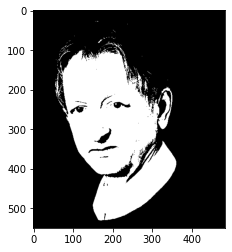

In [21]:
Bin_global(img,120)

In [22]:
# threshold the image (otsu)
def Bin_otsu(img,threshold_val):
    ret, thresh = cv2.threshold(img,threshold_val,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.imshow(thresh,cmap='gray')
    return thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

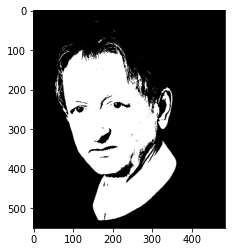

In [23]:
Bin_otsu(img,120)

In [24]:
# threshold the image (adaptive)
def Bin_adaptive(img,blk_size,C):
    thresh = th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blk_size,C)
    plt.imshow(thresh,cmap='gray')
    return thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

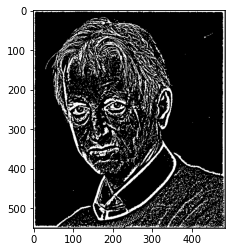

In [25]:
Bin_adaptive(img,19,-5)

# Q1-B

In [28]:
def Img_segmentation_Seed_base(img):
    global clicks
    clicks = []
    seed = []
    cv2.namedWindow('Input')
    cv2.setMouseCallback('Input', on_mouse, 0, ) 
    cv2.imshow('Input',img) 
    cv2.waitKey()

    seed.append(clicks[-1])
    binaryImg = regionGrowSeed(img,seed,25)
    
    plt.figure()
    plt.imshow(binaryImg,cmap='gray')
    
    return binaryImg

In [27]:
def Img_segmentation_neighbor_base(img):
    global clicks
    clicks = []
    seed = []
    cv2.namedWindow('Input')
    cv2.setMouseCallback('Input', on_mouse, 0, ) 
    cv2.imshow('Input',img) 
    cv2.waitKey()

    seed.append(clicks[-1])
    binaryImg = regionGrow(img,seed,3.9,8)
    
    plt.figure()
    plt.imshow(binaryImg,cmap='gray')
    
    return binaryImg

In [29]:
def on_mouse(event, x, y, flags, params): 
    if event == cv2.EVENT_LBUTTONDOWN: 
        global clicks
        clicks.append((y,x))
        return

In [30]:
# region grow based on neighbors
def regionGrow(gray, seeds, thresh, p):
    seedMark = np.zeros(gray.shape)
    #Eight neighborhoods
    if p == 8:
        connection = [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1)]
    elif p == 4:
        connection = [(-1, 0), (0, 1), (1, 0), (0, -1)]

    #The growth stops when there is no element in seeds
    while len(seeds) != 0:
        #Stack top element out of stack
        pt = seeds.pop(0)
        for i in range(p):
            tmpX = pt[0] + connection[i][0]
            tmpY = pt[1] + connection[i][1]

            #Detect boundary points
            if tmpX < 0 or tmpY < 0 or tmpX >= gray.shape[0] or tmpY >= gray.shape[1]:
                continue

            if abs(int(gray[tmpX, tmpY]) - int(gray[pt])) < thresh and seedMark[tmpX, tmpY] == 0:
                seedMark[tmpX, tmpY] = 255
                seeds.append((tmpX, tmpY))
    return seedMark

In [31]:
# region grow based on seed
def regionGrowSeed(gray, seeds, thresh):
    seedMark = np.zeros(gray.shape)
    
    pt = seeds.pop(0)
    
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            if abs(int(gray[i, j]) - int(gray[pt])) < thresh and seedMark[i, j] == 0:
                seedMark[i, j] = 255
                
    return seedMark

## Test First method

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 255., 255., ..., 255., 255.,   0.],
       [  0., 255., 255., ..., 255., 255.,   0.],
       ...,
       [  0., 255., 255., ...,   0.,   0.,   0.],
       [  0., 255., 255., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

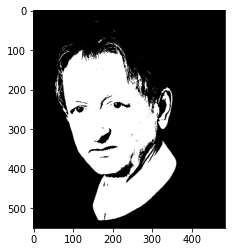

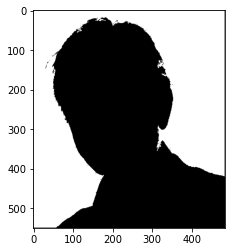

In [32]:
img = cv2.imread('hinton.jpg',0)
Thresh_img = Bin_otsu(img,120)
Img_segmentation_neighbor_base(img)

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

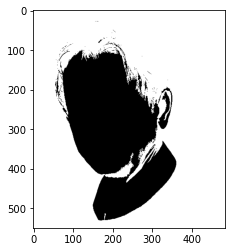

In [33]:
Img_segmentation_neighbor_base(Thresh_img)

# Test Second method

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 255., 255., ..., 255., 255.,   0.],
       [  0., 255., 255., ..., 255., 255.,   0.],
       ...,
       [  0., 255., 255., ...,   0.,   0.,   0.],
       [  0., 255., 255., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

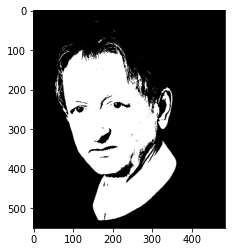

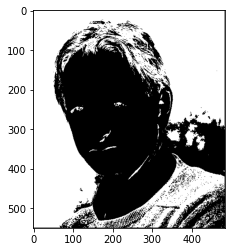

In [34]:
img = cv2.imread('hinton.jpg',0)
Thresh_img = Bin_otsu(img,120)
Img_segmentation_Seed_base(img)

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

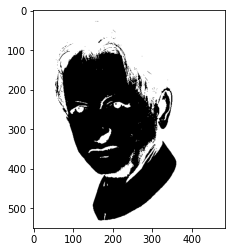

In [35]:
Img_segmentation_Seed_base(Thresh_img)

# Q3-A

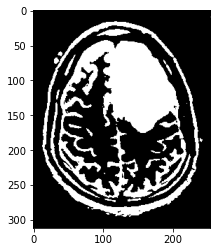

In [16]:
img = cv2.imread('brain.jpg',0)
img_Thresh = Bin_otsu(img,0)

# Q3-B

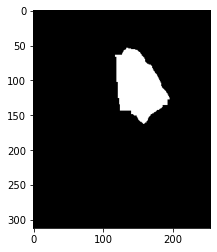

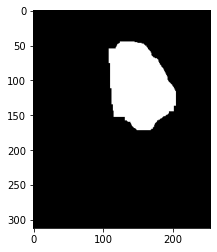

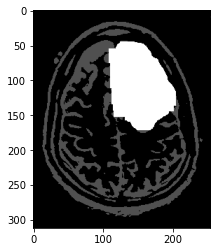

In [17]:
kernel = np.ones((7,7),np.uint8)

erosion = cv2.erode(img_Thresh,kernel,iterations = 3)
dilation = cv2.dilate(erosion,kernel,iterations = 3)

output = cv2.addWeighted(img_Thresh, 0.3, dilation, 0.65, 0.0)

plt.imshow(erosion,cmap='gray')
plt.figure()
plt.imshow(dilation,cmap='gray')
plt.figure()
plt.imshow(output,cmap='gray')

# Q3-C

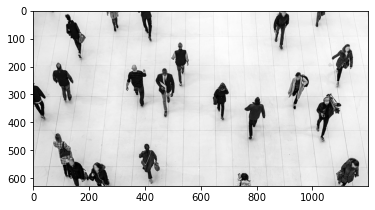

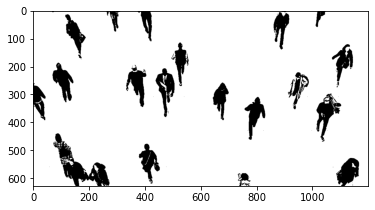

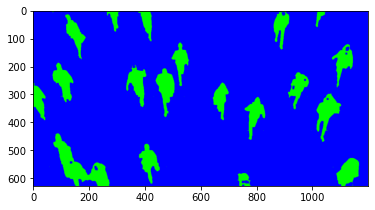

In [20]:
img = cv2.imread('humans_1.jpg',0)
img_Thresh = Bin_otsu(img,120)

opening = cv2.morphologyEx(img_Thresh, cv2.MORPH_OPEN, kernel)

img_rgb = cv2.cvtColor(opening,cv2.COLOR_GRAY2RGB)
img_hsv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
out = convert(img_hsv,opening)

plt.imshow(img,cmap='gray')
plt.figure()
plt.imshow(img_Thresh,cmap='gray')
plt.figure()
#img_out = cv2.cvtColor(out,cv2.COLOR_HSV2RGB)
plt.imshow(out)

In [19]:
def convert(image,result):
    H = image[:,:,0]
    S = image[:,:,1]
    V = image[:,:,2] 
    # you shold implement part a,b,c and in the last use following code

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            if result[i][j] == 0:
                #fig1[i][j] = 128
                H[i][j] = 0
                S[i][j] = 255
                V[i][j] = 0
            else:
                H[i][j] = 0
                S[i][j] = 0
                V[i][j] = 255
    image[:,:,0] = H
    image[:,:,1] = S
    image[:,:,2] = V
    
    
    return image

# Q3-D

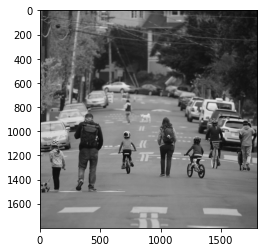

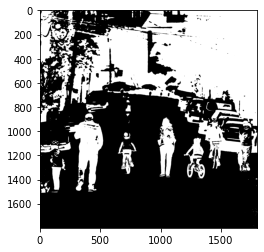

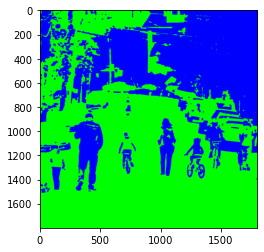

In [22]:
kernel = np.ones((7,7),np.uint8)
img = cv2.imread('humans_2.jpg',0)
img_Thresh = Bin_otsu(~img,120)

opening = cv2.morphologyEx(img_Thresh, cv2.MORPH_OPEN, kernel)

img_rgb = cv2.cvtColor(opening,cv2.COLOR_GRAY2RGB)
img_hsv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
out = convert(img_hsv,opening)

plt.imshow(img,cmap='gray')
plt.figure()
plt.imshow(img_Thresh,cmap='gray')
plt.figure()
#img_out = cv2.cvtColor(out,cv2.COLOR_HSV2RGB)
plt.imshow(out)

# Q4

In [23]:
def Fill_diff_contours(img):
    
    imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    thrash = Bin_otsu(imgGry,240)

    contours , hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
        cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
        x = approx.ravel()[0]
        y = approx.ravel()[1] - 5
        if len(approx) == 3:
            pass
        elif len(approx) == 4 :
            x, y , w, h = cv2.boundingRect(approx)
            aspectRatio = float(w)/h
            if aspectRatio >= 0.95 and aspectRatio < 1.05:
                cv2.drawContours(img, [contour], -1, (125, 125, 0), -1)

            else:
                if(len(contour) < 1000):
                    cv2.drawContours(img, [contour], -1, (0, 255, 0), -1)

        elif len(approx) == 5 :
            pass
        elif len(approx) == 12:
        
            x, y , w, h = cv2.boundingRect(approx)
            aspectRatio = float(w)/h
        
            if(aspectRatio < 1):
                cv2.drawContours(img, [contour], -1, (122, 100, 128), -1)
            else:
                cv2.drawContours(img, [contour], -1, (0, 65, 128), -1)
        else:
            cv2.drawContours(img, [contour], -1, (200, 20, 100), -1)
    return img
#cv2.imshow('shapes', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

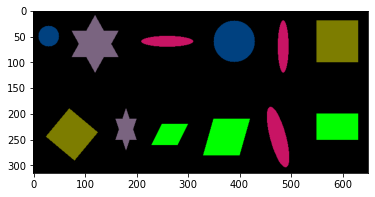

In [24]:
img = cv2.imread('shapes.jpg')
plt.imshow(Fill_diff_contours(img))

# Q2

In [25]:
img = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,1,1,0,0,0,0,1,1,1,0,1,1,0,0],
                [0,1,1,1,0,0,0,0,1,0,0,1,1,1,0],
                [0,1,1,1,1,0,0,0,1,0,0,1,1,1,0],
                [0,1,1,1,1,0,0,0,1,0,0,1,1,0,0],
                [0,1,1,1,0,0,0,0,1,0,0,1,0,0,0],
                [0,1,1,0,0,0,0,1,1,1,0,1,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
               ],dtype=np.uint8)

In [26]:
img = img * 255

print(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 255 255   0   0   0   0 255 255 255   0 255 255   0   0]
 [  0 255 255 255   0   0   0   0 255   0   0 255 255 255   0]
 [  0 255 255 255 255   0   0   0 255   0   0 255 255 255   0]
 [  0 255 255 255 255   0   0   0 255   0   0 255 255   0   0]
 [  0 255 255 255   0   0   0   0 255   0   0 255   0   0   0]
 [  0 255 255   0   0   0   0 255 255 255   0 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


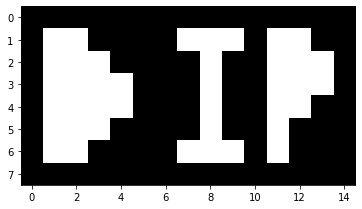

In [27]:
plt.imshow(img,'gray')

In [44]:
kernel = np.ones((3,1),np.uint8)

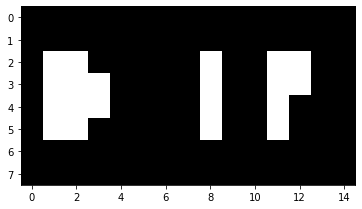

In [45]:
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion,cmap='gray')